#  Mushroom Dataset - 决策树
Kaggle竞赛蘑菇数据集，根据22维特征判断蘑菇是有毒/可食用。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

In [2]:
data = pd.read_csv('./data/' + "mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

该数据集没有空值／缺失数据，全为object类型，需要转换为数值类型才能用模型拟合。

In [5]:
for col in data.columns:
    print('\n*', col, '*')
    print(data[col].value_counts())


* class *
e    4208
p    3916
Name: class, dtype: int64

* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
N

In [4]:
np.unique(data['class'])

array(['e', 'p'], dtype=object)

In [7]:
# 对树模型，用LabelEncoder更合适
from sklearn.preprocessing import LabelEncoder 

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


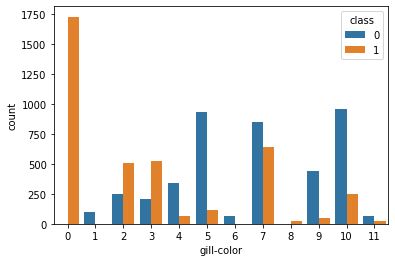

In [11]:
sns.countplot(x="gill-color", hue="class", data=data);

gill-color特征在class为0和1时候的分布明显不同，看起来是个很好的特征。

In [20]:
type(data.iloc[:, data.columns=='class'])

pandas.core.frame.DataFrame

In [19]:
type(data['class'])

pandas.core.series.Series

In [21]:
y = data['class']   
X = data.drop(['class'], axis=1)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
columns = X_train.columns

In [23]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4304,2,0,9,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,5,1
2930,5,0,3,1,5,1,0,0,10,1,...,2,3,7,0,2,1,4,3,4,0
5706,5,2,3,1,2,1,0,0,10,1,...,2,7,7,0,2,1,4,1,4,1
1855,5,0,4,1,5,1,0,0,5,1,...,2,6,7,0,2,1,4,3,5,0
3125,2,3,3,1,5,1,0,0,5,1,...,2,6,6,0,2,1,4,3,5,0


In [29]:
# 索引恢复
for dataset in [X_train, X_test, y_train, y_test]:
    dataset.index = range(dataset.shape[0])
    
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,9,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,5,1
1,5,0,3,1,5,1,0,0,10,1,...,2,3,7,0,2,1,4,3,4,0
2,5,2,3,1,2,1,0,0,10,1,...,2,7,7,0,2,1,4,1,4,1
3,5,0,4,1,5,1,0,0,5,1,...,2,6,7,0,2,1,4,3,5,0
4,2,3,3,1,5,1,0,0,5,1,...,2,6,6,0,2,1,4,3,5,0


体验一下分裂及gini计算

In [33]:
df = pd.DataFrame({'gill-color':X_train['gill-color'], 'class':y_train})
df = df.sort_values(by=['gill-color'], ascending=True)
df.head()

,gill-color,class
2827,0,1
4751,0,1
1309,0,1
4753,0,1
4757,0,1


In [34]:
np.unique(X_train['gill-color'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
gini = []

for i in range(11):
    threshold = i + 0.5
    D1 = df[df['gill-color'] <= threshold]
    D2 = df[df['gill-color'] > threshold]
    
    D1_0_num = (D1['class'] == 0).sum()
    D1_1_num = (D1['class'] == 1).sum()
    D2_0_num = (D2['class'] == 0).sum()
    D2_1_num = (D2['class'] == 1).sum()
    
    D1_num = D1_0_num + D1_1_num
    D2_num = D2_0_num + D2_1_num
    D_num = D1_num + D2_num
    
    gini_D1 = 2*(D1_0_num/D1_num)*(D1_1_num/D1_num)
    gini_D2 = 2*(D2_0_num/D2_num)*(D2_1_num/D2_num)
    
    gini.append(D1_num/D_num*gini_D1 + D2_num/D_num*gini_D2)
    
gini

[0.3552829947340824,
 0.3736915665763262,
 0.36355499000932695,
 0.32961494945779235,
 0.37002823166056487,
 0.4489772571127642,
 0.4529550073634624,
 0.4495720946706102,
 0.4464461251742535,
 0.47089288245080574,
 0.49838655256057063]

## 默认参数的决策树

In [38]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_prob = model_tree.predict_proba(X_test)
y_prob = y_prob[:, 1]  # This will give you positive class prediction probabilities
y_prob

array([0., 1., 1., ..., 1., 1., 0.])

In [53]:
y_prob.shape

(1625,)

In [54]:
y_pred = np.where(y_prob > 0.5, 1, 0)  # This will threshold the probabilities to give class predictions.
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [55]:
model_tree.score(X_test, y_test)

1.0

In [56]:
print('The AUC of default Desicion Tree is', roc_auc_score(y_test, y_pred))

The AUC of default Desicion Tree is 1.0


In [57]:
model_tree.feature_importances_

array([0.        , 0.        , 0.00645071, 0.02899014, 0.        ,
       0.        , 0.        , 0.11322164, 0.33996486, 0.02545761,
       0.04612669, 0.        , 0.00217222, 0.0183515 , 0.        ,
       0.        , 0.        , 0.00142318, 0.00396149, 0.20806724,
       0.17379841, 0.03201433])

In [61]:
df = pd.DataFrame({"columns":columns, "importance":list(model_tree.feature_importances_.T)})
df.sort_values(by=['importance'], ascending=False)

,columns,importance
8,gill-color,0.339965
19,spore-print-color,0.208067
20,population,0.173798
7,gill-size,0.113222
10,stalk-root,0.046127
21,habitat,0.032014
3,bruises,0.028990
9,stalk-shape,0.025458
13,stalk-color-above-ring,0.018352
2,cap-color,0.006451


In [62]:
[*zip(columns, model_tree.feature_importances_)]

[('cap-shape', 0.0),
 ('cap-surface', 0.0),
 ('cap-color', 0.006450711853675578),
 ('bruises', 0.028990140641972938),
 ('odor', 0.0),
 ('gill-attachment', 0.0),
 ('gill-spacing', 0.0),
 ('gill-size', 0.11322163583704606),
 ('gill-color', 0.33996486042096563),
 ('stalk-shape', 0.025457607053987214),
 ('stalk-root', 0.046126685461257956),
 ('stalk-surface-above-ring', 0.0),
 ('stalk-surface-below-ring', 0.0021722166864712594),
 ('stalk-color-above-ring', 0.018351501615989013),
 ('stalk-color-below-ring', 0.0),
 ('veil-type', 0.0),
 ('veil-color', 0.0),
 ('ring-number', 0.0014231805885495015),
 ('ring-type', 0.003961485671113098),
 ('spore-print-color', 0.20806723912723854),
 ('population', 0.17379840784897285),
 ('habitat', 0.03201432719276024)]

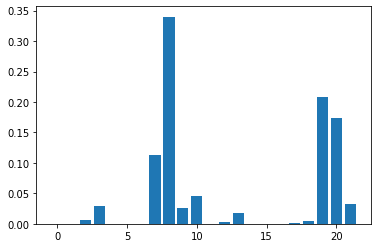

In [65]:
plt.bar(range(len(model_tree.feature_importances_)), model_tree.feature_importances_)
plt.show()

In [66]:
print("Classification report for classifier %s:\n%s\n" % (model_tree, classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625




## 可根据特征重要性做特征选择

In [67]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(model_tree.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model_tree, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)

  # train model
  selection_model = DecisionTreeClassifier()
  selection_model.fit(select_X_train, y_train)
    
# eval model
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.000, n=22, Accuracy: 100.00%
Thresh=0.001, n=13, Accuracy: 100.00%
Thresh=0.002, n=12, Accuracy: 100.00%
Thresh=0.004, n=11, Accuracy: 100.00%
Thresh=0.006, n=10, Accuracy: 100.00%
Thresh=0.018, n=9, Accuracy: 100.00%
Thresh=0.025, n=8, Accuracy: 100.00%
Thresh=0.029, n=7, Accuracy: 100.00%
Thresh=0.032, n=6, Accuracy: 99.08%
Thresh=0.046, n=5, Accuracy: 99.32%
Thresh=0.113, n=4, Accuracy: 98.28%
Thresh=0.174, n=3, Accuracy: 94.22%
Thresh=0.208, n=2, Accuracy: 93.05%
Thresh=0.340, n=1, Accuracy: 80.98%


In [68]:
# Fit model using the best threshhold
thresh = 0.020
selection = SelectFromModel(model_tree, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)

# train model
selection_model = DecisionTreeClassifier()
selection_model.fit(select_X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

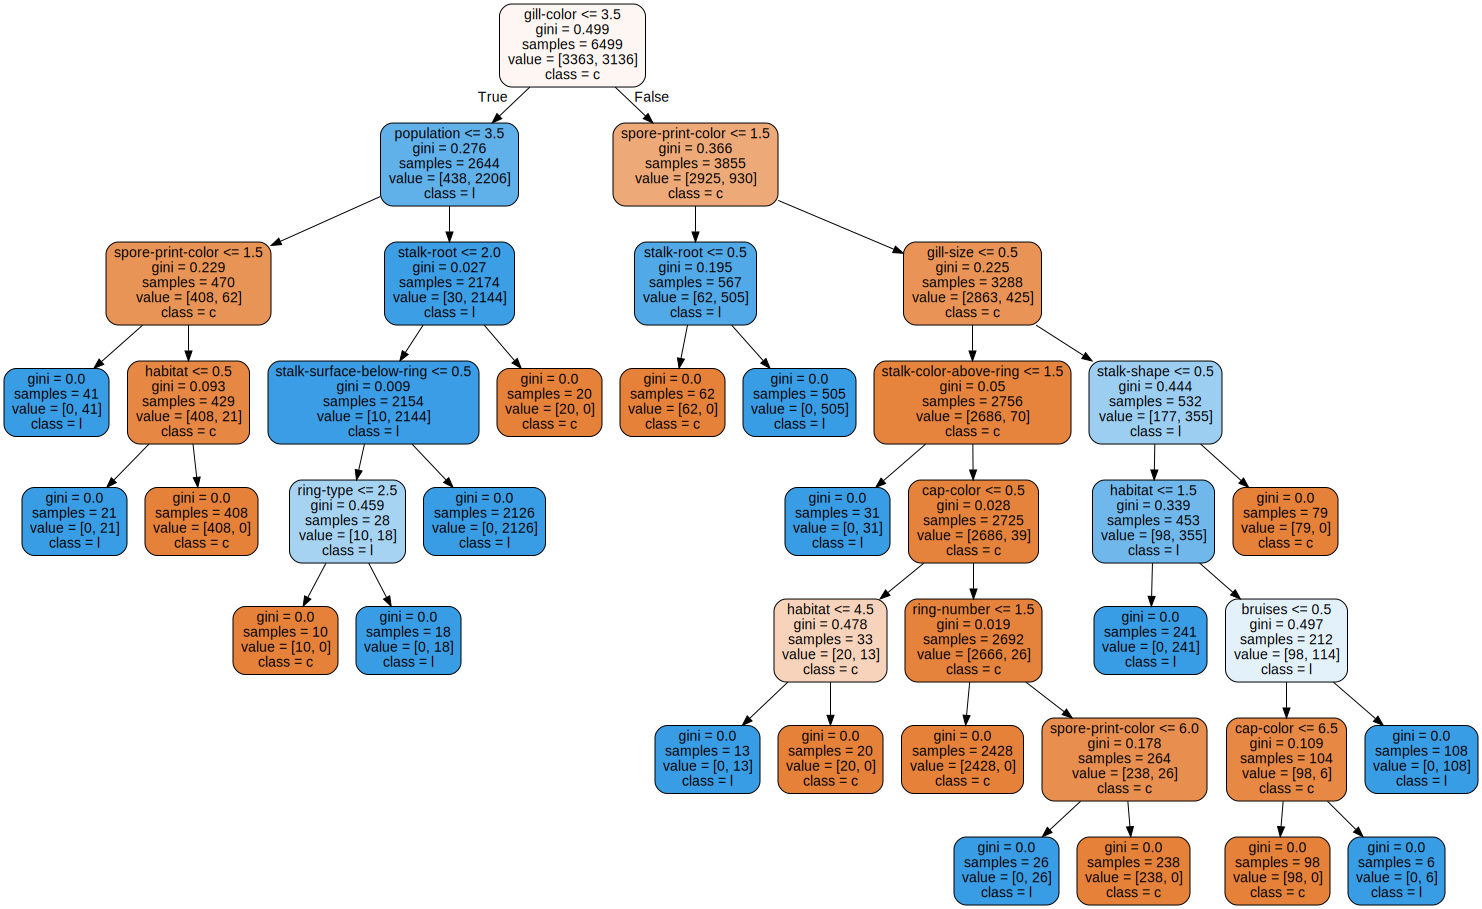

In [83]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(model_tree, feature_names=columns,  
                         class_names='class', filled=True, rounded=True) 

graph = graphviz.Source(dot_data)
graph 

In [84]:
graph.render("tree")

'tree.pdf'